In [1]:
import jyrobot
import math

In [2]:
world = jyrobot.load("two-scribblers-no-walls")

In [3]:
world.watch("panel")

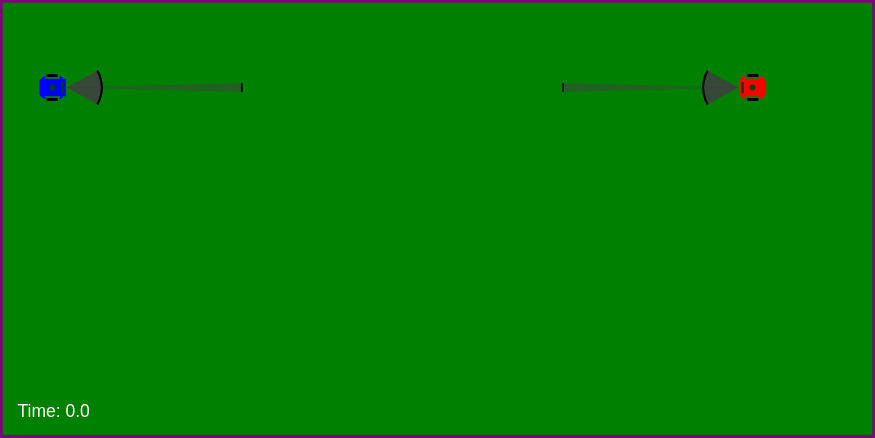

In [4]:
world.canvas.takePicture()

In [5]:
world.reset()

In [6]:
world.robots[1].va = math.pi/40
world.robots[0].x = 100

In [8]:
world.seconds(10.0)

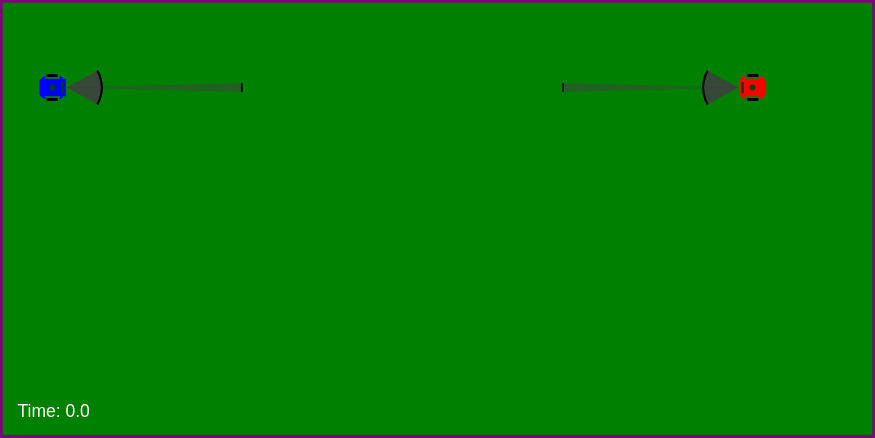

In [6]:
world.canvas.takePicture()

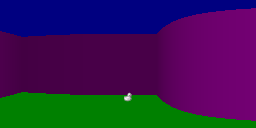

In [5]:
world.robots[0].cameras[0].takePicture()